# LendingClub Data Exploratory Analysis

### Import library

In [22]:
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Pandas options
pd.set_option('display.max_colwidth', 1000, 'display.max_rows', None, 'display.max_columns', None)

# Plotting options
%matplotlib inline
mpl.style.use('ggplot')
sns.set(style='whitegrid')

### Import data

In [86]:
# skip row 1 so pandas can parse the data properly.
loans = pd.read_csv('lending_club_loans.csv', skiprows=1, low_memory=False)

missing_fractions = loans.isnull().mean().sort_values(ascending=False)

In [87]:
missing_fractions.head(10)

total_il_high_credit_limit    1.0
mo_sin_old_rev_tl_op          1.0
bc_util                       1.0
bc_open_to_buy                1.0
avg_cur_bal                   1.0
acc_open_past_24mths          1.0
inq_last_12m                  1.0
total_cu_tl                   1.0
inq_fi                        1.0
total_rev_hi_lim              1.0
dtype: float64

In [88]:
half_count = len(loans) / 2
loans = loans.dropna(thresh=half_count,axis=1) # Drop any column with more than 50% missing values
loans = loans.drop(['url','desc'],axis=1) # These columns are not useful for our purposes
loans.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,735.0,739.0,1.0,3.0,0.0,13648.0,83.7%,9.0,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-2015,171.62,Sep-2016,744.0,740.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,car,bike,309xx,GA,1.00,0.0,Apr-1999,740.0,744.0,5.0,3.0,0.0,1687.0,9.4%,4.0,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,Sep-2016,499.0,0.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,735.0,739.0,2.0,2.0,0.0,2956.0,98.5%,10.0,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-2014,649.91,Sep-2016,719.0,715.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
3,1076863,1277178.0,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,other,personel,917xx,CA,20.00,0.0,Feb-1996,690.0,694.0,1.0,10.0,0.0,5598.0,21%,37.0,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-2015,357.48,Apr-2016,604.0,600.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
4,1075358,1311748.0,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Current,n,other,Personal,972xx,OR,17.94,0.0,Jan-1996,695.0,699.0,0.0,15.0,0.0,27783.0,53.9%,38.0,f,270.78,270.78,3784.490000,3784.49,2729.22,1055.27,0.00,0.00,0.00,Sep-2016,67.79,Sep-2016,694.0,690.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0


In [89]:
loans.shape

(42538, 56)

In [90]:
loans['int_rate'] = loans['int_rate'].str.strip().str.strip('%').astype(float)/100

In [91]:
# Get null values for each column
for col in loans.columns:
    print("{} : {}".format(col, loans[col].isnull().sum()))

id : 0
member_id : 3
loan_amnt : 3
funded_amnt : 3
funded_amnt_inv : 3
term : 3
int_rate : 3
installment : 3
grade : 3
sub_grade : 3
emp_title : 2629
emp_length : 1115
home_ownership : 3
annual_inc : 7
verification_status : 3
issue_d : 3
loan_status : 3
pymnt_plan : 3
purpose : 3
title : 16
zip_code : 3
addr_state : 3
dti : 3
delinq_2yrs : 32
earliest_cr_line : 32
fico_range_low : 3
fico_range_high : 3
inq_last_6mths : 32
open_acc : 32
pub_rec : 32
revol_bal : 3
revol_util : 93
total_acc : 32
initial_list_status : 3
out_prncp : 3
out_prncp_inv : 3
total_pymnt : 3
total_pymnt_inv : 3
total_rec_prncp : 3
total_rec_int : 3
total_rec_late_fee : 3
recoveries : 3
collection_recovery_fee : 3
last_pymnt_d : 86
last_pymnt_amnt : 3
last_credit_pull_d : 7
last_fico_range_high : 3
last_fico_range_low : 3
collections_12_mths_ex_med : 148
policy_code : 3
application_type : 3
acc_now_delinq : 32
chargeoff_within_12_mths : 148
delinq_amnt : 32
pub_rec_bankruptcies : 1368
tax_liens : 108


### Import data dictionary

In [92]:
data_dictionary = pd.read_csv('LCDataDictionary.csv') # Loading in the data dictionary
print(data_dictionary.shape[0])
print(data_dictionary.columns.tolist())

117
['LoanStatNew', 'Description']


In [97]:
data_dictionary.head()
data_dictionary = data_dictionary.rename(columns={'LoanStatNew': 'name', 'Description': 'description'})

In [96]:
loans_dtypes = pd.DataFrame(loans.dtypes,columns=['dtypes'])
loans_dtypes = loans_dtypes.reset_index()
loans_dtypes['name'] = loans_dtypes['index']
loans_dtypes = loans_dtypes[['name','dtypes']]
loans_dtypes['first value'] = loans.loc[0].values
preview = loans_dtypes.merge(data_dictionary, on='name',how='left')
preview

,name,dtypes,first value,description
0,id,object,1077501,A unique LC assigned ID for the loan listing.
1,member_id,float64,1.2966e+06,A unique LC assigned Id for the borrower member.
2,loan_amnt,float64,5000,"The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value."
3,funded_amnt,float64,5000,The total amount committed to that loan at that point in time.
4,funded_amnt_inv,float64,4975,The total amount committed by investors for that loan at that point in time.
5,term,object,36 months,The number of payments on the loan. Values are in months and can be either 36 or 60.
6,int_rate,float64,0.1065,Interest Rate on the loan
7,installment,float64,162.87,The monthly payment owed by the borrower if the loan originates.
8,grade,object,B,LC assigned loan grade
9,sub_grade,object,B2,LC assigned loan subgrade


##  Pre-processing and Exploratory Analysis

### FICO Score 
1. Drop the feature if it is not useful for predicting the loan status.
2. View summary statistics and visualize the data, plotting against the loan status.
3. Modify the feature to make it useful for modeling, if necessary.


Define a function for plotting a variable and comparing with the loan status:

In [98]:
def plot_var(col_name, full_name, continuous):
    """
    Visualize a variable with and without faceting on the loan status.
    - col_name is the variable name in the dataframe
    - full_name is the full variable name
    - continuous is True if the variable is continuous, False otherwise
    """
    f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,3), dpi=90)
    
    # Plot without loan status
    if continuous:
        sns.distplot(loans.loc[loans[col_name].notnull(), col_name], kde=False, ax=ax1)
    else:
        sns.countplot(loans[col_name], order=sorted(loans[col_name].unique()), color='#5975A4', saturation=1, ax=ax1)
    ax1.set_xlabel(full_name)
    ax1.set_ylabel('Count')
    ax1.set_title(full_name)

    # Plot with loan status
    if continuous:
        sns.boxplot(x=col_name, y='loan_status', data=loans, ax=ax2)
        ax2.set_ylabel('')
        ax2.set_title(full_name + ' by Loan Status')
    else:
        charge_off_rates = loans.groupby(col_name)['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']
        sns.barplot(x=charge_off_rates.index, y=charge_off_rates.values, color='#5975A4', saturation=1, ax=ax2)
        ax2.set_ylabel('Fraction of Loans Charged-off')
        ax2.set_title('Charge-off Rate by ' + full_name)
    ax2.set_xlabel(full_name)
    
    plt.tight_layout()

In [99]:
print(list(loans.columns))

['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens']


### ID
they are all unique. 

In [100]:
loans['id'].sample(5)

13334     784786
27567     552432
3056     1026310
33943     460957
17689     712405
Name: id, dtype: object

In [101]:
loans['id'].describe()

count      42538
unique     42538
top       538444
freq           1
Name: id, dtype: object

In [71]:
print(loans_2007['fico_range_low'].unique())
print(loans_2007['fico_range_high'].unique())

[735. 740. 690. 695. 730. 660. 675. 725. 710. 705. 720. 665. 670. 760.
 685. 755. 680. 700. 790. 750. 715. 765. 745. 770. 780. 775. 795. 810.
 800. 815. 785. 805. 825. 820. 630. 625.  nan 650. 655. 645. 640. 635.
 610. 620. 615.]
[739. 744. 694. 699. 734. 664. 679. 729. 714. 709. 724. 669. 674. 764.
 689. 759. 684. 704. 794. 754. 719. 769. 749. 774. 784. 779. 799. 814.
 804. 819. 789. 809. 829. 824. 634. 629.  nan 654. 659. 649. 644. 639.
 614. 624. 619.]


### loan_amnt
**Data Dictionary**: "The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value."

In [102]:
loans['loan_amnt'].describe()

count    42535.000000
mean     11089.722581
std       7410.938391
min        500.000000
25%       5200.000000
50%       9700.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

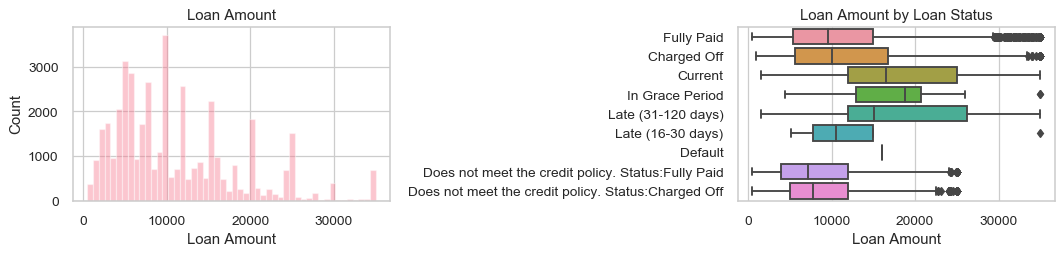

In [105]:
plot_var('loan_amnt', 'Loan Amount', continuous=True)

+ Charged-off loans tend to have higher loan amounts. Let's compare the summary statistics by loan status:

In [106]:
loans.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5653.0,12133.849284,8099.601906,900.0,5600.0,10000.0,16750.0,35000.0
Current,513.0,18177.192982,8798.926344,1500.0,12000.0,16500.0,25000.0,35000.0
Default,1.0,16000.000000,NaN,16000.0,16000.0,16000.0,16000.0,16000.0
Does not meet the credit policy. Status:Charged Off,761.0,9527.233903,6404.598723,500.0,5000.0,7750.0,12000.0,25000.0
Does not meet the credit policy. Status:Fully Paid,1988.0,8853.231891,6163.442950,500.0,4000.0,7200.0,12000.0,25000.0
Fully Paid,33586.0,10966.564193,7260.165934,500.0,5375.0,9600.0,15000.0,35000.0
In Grace Period,16.0,18493.750000,8437.695677,4450.0,12900.0,18850.0,20687.5,35000.0
Late (16-30 days),5.0,14700.000000,11913.018089,5200.0,7800.0,10500.0,15000.0,35000.0
Late (31-120 days),12.0,18743.750000,10231.202970,1500.0,12000.0,15062.5,26250.0,35000.0


### term

In [107]:
loans['term'].value_counts(dropna=False)

 36 months    31534
 60 months    11001
NaN               3
Name: term, dtype: int64

### int_rate

In [108]:
loans['int_rate'].describe()

count    42535.000000
mean         0.121650
std          0.037079
min          0.054200
25%          0.096300
50%          0.119900
75%          0.147200
max          0.245900
Name: int_rate, dtype: float64

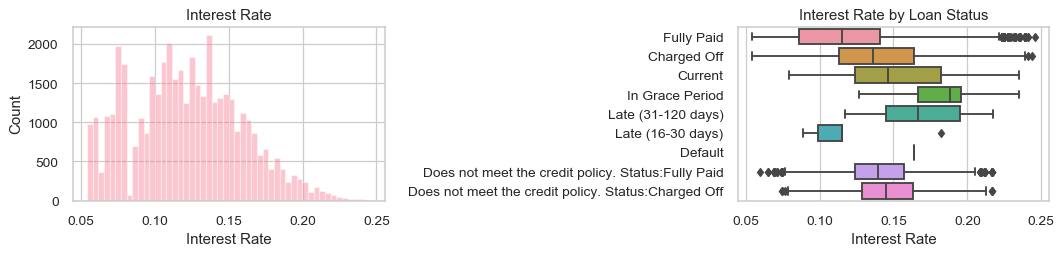

In [109]:
plot_var('int_rate', 'Interest Rate', continuous=True)

### installment
+ Data Dictionary: "The monthly payment owed by the borrower if the loan originates."

In [110]:
loans['installment'].describe()

count    42535.000000
mean       322.623063
std        208.927216
min         15.670000
25%        165.520000
50%        277.690000
75%        428.180000
max       1305.190000
Name: installment, dtype: float64

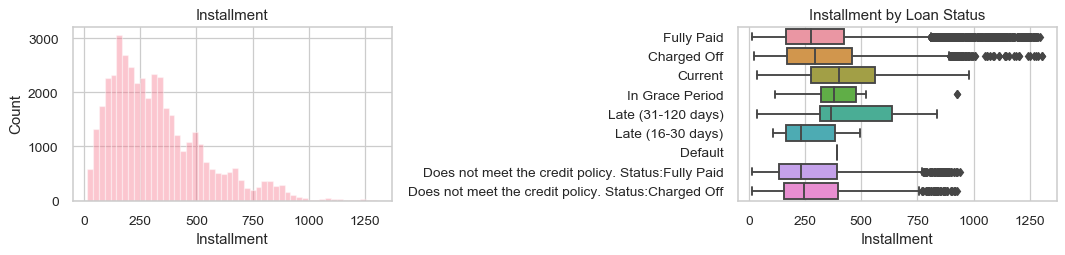

In [111]:
plot_var('installment', 'Installment', continuous=True)

### grade, sub_grade
+ Data Dictionary for grade: "LendingClub assigned loan grade."

+ Data Dictionary for sub_grade: "LendingClub assigned loan subgrade."

In [116]:
print(sorted(loans['grade'].dropna().unique()))

['A', 'B', 'C', 'D', 'E', 'F', 'G']


In [118]:
print(sorted(loans['sub_grade'].dropna().unique()))

['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5']


42538
42535


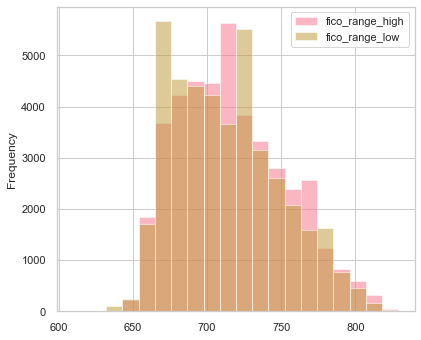

In [72]:
fico_columns = ['fico_range_high','fico_range_low']
print(loans_2007.shape[0])
loans_2007.dropna(subset=fico_columns,inplace=True)
print(loans_2007.shape[0])
loans_2007[fico_columns].plot.hist(alpha=0.5,bins=20);

### loan status

In [73]:
preview[preview.name == 'loan_status']

,name,dtypes,first value,description
16,loan_status,object,Fully Paid,Current status of the loan


In [74]:
loans_2007["loan_status"].value_counts()


Fully Paid                                             33586
Charged Off                                             5653
Does not meet the credit policy. Status:Fully Paid      1988
Does not meet the credit policy. Status:Charged Off      761
Current                                                  513
In Grace Period                                           16
Late (31-120 days)                                        12
Late (16-30 days)                                          5
Default                                                    1
Name: loan_status, dtype: int64

In [75]:
meaning = [
"Loan has been fully paid off.",
"Loan for which there is no longer a reasonable expectation of further payments.",
"While the loan was paid off, the loan application today would no longer meet the credit policy and wouldn't be approved on to the marketplace.",
"While the loan was charged off, the loan application today would no longer meet the credit policy and wouldn't be approved on to the marketplace.",
"Loan is up to date on current payments.",
"The loan is past due but still in the grace period of 15 days.",
"Loan hasn't been paid in 31 to 120 days (late on the current payment).",
"Loan hasn't been paid in 16 to 30 days (late on the current payment).",
"Loan is defaulted on and no payment has been made for more than 121 days."]
status, count = loans_2007["loan_status"].value_counts().index, loans_2007["loan_status"].value_counts().values
loan_statuses_explanation = pd.DataFrame({'Loan Status': status,'Count': count,'Meaning': meaning})[['Loan Status','Count','Meaning']]
loan_statuses_explanation

,Loan Status,Count,Meaning
0,Fully Paid,33586,Loan has been fully paid off.
1,Charged Off,5653,Loan for which there is no longer a reasonable expectation of further payments.
2,Does not meet the credit policy. Status:Fully Paid,1988,"While the loan was paid off, the loan application today would no longer meet the credit policy and wouldn't be approved on to the marketplace."
3,Does not meet the credit policy. Status:Charged Off,761,"While the loan was charged off, the loan application today would no longer meet the credit policy and wouldn't be approved on to the marketplace."
4,Current,513,Loan is up to date on current payments.
5,In Grace Period,16,The loan is past due but still in the grace period of 15 days.
6,Late (31-120 days),12,Loan hasn't been paid in 31 to 120 days (late on the current payment).
7,Late (16-30 days),5,Loan hasn't been paid in 16 to 30 days (late on the current payment).
8,Default,1,Loan is defaulted on and no payment has been made for more than 121 days.


Text(0.5, 0, 'Count')

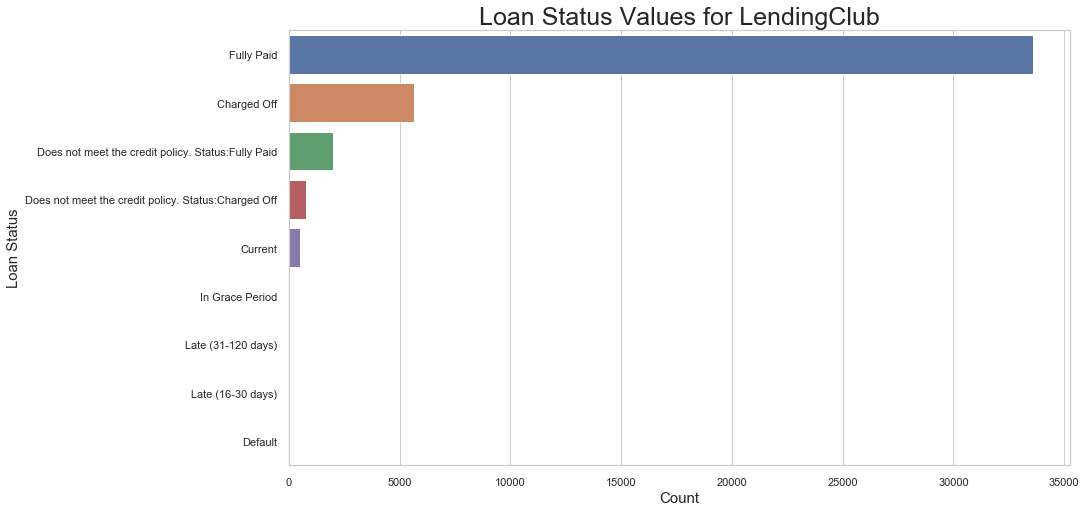

In [76]:
loan_status_vis = loans_2007['loan_status'].value_counts()
# Plot the value counts
plt.figure(figsize=(14,8))
# from jupyterthemes import jtplot
# jtplot.style(theme='monokai')
mpl.style.use('ggplot')
sns.set(style='whitegrid')
sns.barplot(y=loan_status_vis.index, x=loan_status_vis)
plt.title('Loan Status Values for LendingClub', fontsize=25)
plt.ylabel('Loan Status', fontsize=15)
plt.xlabel('Count', fontsize=15)

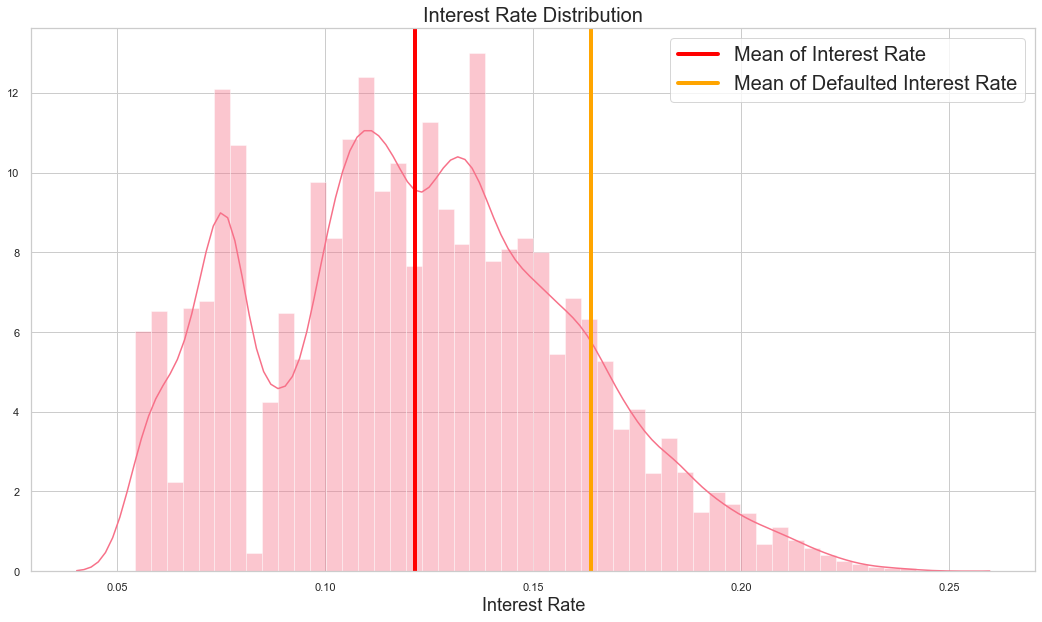

In [78]:
default_vis = loans_2007[loans_2007.loan_status == 'Default']

# Visualize the distribution of interest rates
sns.set_palette("husl")
plt.figure(figsize=(18,10))
sns.distplot(loans_2007['int_rate'], hist='density')
plt.axvline(x=loans_2007.int_rate.mean(), color='red', linestyle='-', lw=4, label='Mean of Interest Rate')
plt.axvline(x=default_vis.int_rate.mean(), color='orange', linestyle='-', lw=4, label='Mean of Defaulted Interest Rate')
plt.title('Interest Rate Distribution', fontsize=20)
plt.xlabel('Interest Rate', fontsize=18)
plt.legend(fontsize=20)
plt.show()